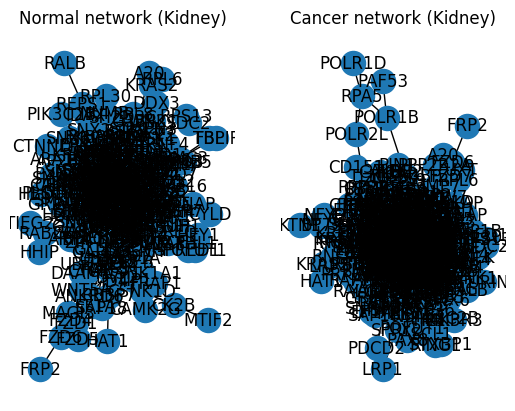

Graph vertex count:-
Normal: 310
Cancer: 491
Graph edge count:-
Normal: 1346
Cancer: 3140
Subgraph vertex count:-
Normal: 310
Cancer: 491
Subgraph edge count:-
Normal: 1346
Cancer: 3140
Subgraph centrality:-
Normal: 0.028103142290427003
Cancer: 0.02610249802568685
Degree centrality:-
Normal: {'14-3-3-zeta': 0.022653721682847898, 'CDC25B': 0.006472491909385114, 'CSNK1A1': 0.016181229773462785, 'CTNNB1': 0.10032362459546926, 'PIK3R1': 0.02912621359223301, 'PRKCA': 0.045307443365695796, 'RAF1': 0.12297734627831716, 'RAN': 0.0744336569579288, 'A20': 0.003236245954692557, 'G3BP2': 0.01941747572815534, 'ABIN2': 0.01941747572815534, 'FLNA': 0.016181229773462785, 'NFKB1': 0.07766990291262137, 'REL': 0.01941747572815534, 'RELA': 0.11650485436893204, 'STK11': 0.006472491909385114, 'TRAF2': 0.06472491909385114, 'ABL1': 0.08414239482200647, 'APP': 0.03236245954692557, 'BCAR1': 0.08737864077669903, 'CDC42': 0.042071197411003236, 'CRKL': 0.10355987055016182, 'FOS': 0.08090614886731393, 'GRB2': 0.126

In [ ]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

def load_graph_from_txt(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as f:
        for line in f:
            nodes = line.strip().split(',')
            if len(nodes) == 2:
                G.add_edge(nodes[0], nodes[1])
    if len(G) == 0:
        return None #return None if the graph is empty
    largest_component = max(nx.connected_components(G), key=len)
    return G.subgraph(largest_component)

# Loading and creating graphs from the datasets
normal_graph = load_graph_from_txt("kidney_normal_data.txt")
cancer_graph = load_graph_from_txt("kidney_cancer_data.txt")

# Computing graph metrics
normal_vertex_count = normal_graph.number_of_nodes()
cancer_vertex_count = cancer_graph.number_of_nodes()
normal_edge_count = normal_graph.number_of_edges()
cancer_edge_count = cancer_graph.number_of_edges()

# Creating subgraphs from the graphs
normal_subgraph = max(nx.connected_components(normal_graph), key=len)
cancer_subgraph = max(nx.connected_components(cancer_graph), key=len)

# Computing subgraph metrics
normal_subgraph_vertex_count = len(normal_subgraph)
cancer_subgraph_vertex_count = len(cancer_subgraph)
normal_subgraph_edge_count = normal_graph.subgraph(normal_subgraph).number_of_edges()
cancer_subgraph_edge_count = cancer_graph.subgraph(cancer_subgraph).number_of_edges()

normal_subgraph_centrality = sum(nx.degree_centrality(normal_graph).get(n, 0) for n in normal_subgraph) / normal_subgraph_vertex_count
cancer_subgraph_centrality = sum(nx.degree_centrality(cancer_graph).get(n, 0) for n in cancer_subgraph) / cancer_subgraph_vertex_count

# Computing centrality metrics
normal_degree = nx.degree_centrality(normal_graph)
cancer_degree = nx.degree_centrality(cancer_graph)
normal_betweenness = nx.betweenness_centrality(normal_graph)
cancer_betweenness = nx.betweenness_centrality(cancer_graph)
normal_closeness = nx.closeness_centrality(normal_graph)
cancer_closeness = nx.closeness_centrality(cancer_graph)

# Computing other network metrics
normal_eccentricity = nx.eccentricity(normal_graph)
cancer_eccentricity = nx.eccentricity(cancer_graph)
normal_diameter = nx.diameter(normal_graph)
cancer_diameter = nx.diameter(cancer_graph)
normal_density = nx.density(normal_graph)
cancer_density = nx.density(cancer_graph)
normal_clustering = nx.average_clustering(normal_graph)
cancer_clustering = nx.average_clustering(cancer_graph)

# Computing graph-level metrics
normal_mean_degree = sum(dict(normal_degree).values()) / len(normal_degree)
cancer_mean_degree = sum(dict(cancer_degree).values()) / len(cancer_degree)
normal_diameter = nx.diameter(normal_graph)
cancer_diameter = nx.diameter(cancer_graph)
normal_radius = nx.radius(normal_graph)
cancer_radius = nx.radius(cancer_graph)

# Computing index of aggregation
normal_ia = nx.algorithms.assortativity.average_neighbor_degree(normal_graph)
cancer_ia = nx.algorithms.assortativity.average_neighbor_degree(cancer_graph)

# Extracting the necessary data for visualization
normal_data = list(nx.degree_centrality(normal_graph).values())
cancer_data = list(nx.degree_centrality(cancer_graph).values())

# Visualizing the networks

# Using matplotlib
plt.subplot(121)
nx.draw(normal_graph, with_labels=True)
plt.title("Normal network (Kidney)")
plt.subplot(122)
nx.draw(cancer_graph, with_labels=True)
plt.title("Cancer network (Kidney)")
plt.show()

"""# Using seaborn
plt.subplot(121)
sns.violinplot(data=normal_data)
plt.title("Normal network (Kidney)")
plt.subplot(122)
sns.violinplot(data=cancer_data)
plt.title("Cancer network (Kidney)")
plt.show()"""

# Comparing all the network metrics
print("Graph vertex count:-")
print("Normal:", normal_vertex_count)
print("Cancer:", cancer_vertex_count)
print("Graph edge count:-")
print("Normal:", normal_edge_count)
print("Cancer:", cancer_edge_count)
print("Subgraph vertex count:-")
print("Normal:", normal_subgraph_vertex_count)
print("Cancer:", cancer_subgraph_vertex_count)
print("Subgraph edge count:-")
print("Normal:", normal_subgraph_edge_count)
print("Cancer:", cancer_subgraph_edge_count)
print("Subgraph centrality:-")
print("Normal:", normal_subgraph_centrality)
print("Cancer:", cancer_subgraph_centrality)
print("Degree centrality:-")
print("Normal:", normal_degree)
print("Cancer:", cancer_degree)
print("Betweenness centrality:-")
print("Normal:", normal_betweenness)
print("Cancer:", cancer_betweenness)
print("Closeness centrality:-")
print("Normal:", normal_closeness)
print("Cancer:", cancer_closeness)
print("Eccentricity:-")
print("Normal:", normal_eccentricity)
print("Cancer:", cancer_eccentricity)
print("Diameter:-")
print("Normal:", normal_diameter)
print("Cancer:", cancer_diameter)
print("Density:-")
print("Normal:", normal_density)
print("Cancer:", cancer_density)
print("Clustering coefficient:-")
print("Normal:", normal_clustering)
print("Cancer:", cancer_clustering)
print("Diameter:-")
print("Normal:", normal_diameter)
print("Cancer:", cancer_diameter)
print("Radius:-")
print("Normal:", normal_radius)
print("Cancer:", cancer_radius)
print("Mean degree:-")
print("Normal:", normal_mean_degree)
print("Cancer:", cancer_mean_degree)
print("Index of aggregation:-")
print("Normal:", normal_ia)
print("Cancer:", cancer_ia)